In [21]:
import os
import h5py

import nexusformat.nexus as nx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from tqdm import tqdm
import pandas as pd

# f = nx.nxload("f:\\git\\eeg_prep\\me\\processed_files\\001_000500_000500.hdf5")

f = nx.nxload("/media/dan/Data/data/sourcesink_eegprep_calculations/processed_files/001_000500_000500.hdf5")
print(f.tree)

root:NXroot
  @date_created = '2024-09-23 17:14:40'
  @description = 'HDF5 file containing iEEG data and calculation...'
  data:NXgroup
    @description = 'windows are shaped (winsize_samps, len(channel...'
    A_mask = int32(609)
    A_mats = float64(118x118x609)
    A_mean = float64(118x118x1)
    A_medians = float64(609)
    A_thresh = -0.06341795947623834
    window_indexs = int32(609x2)
    window_reconstructionError = float64(609)
    windows = float64(512x118x609)
  metadata:NXgroup
    N_samples = 312064
    N_wins = 609
    STEPSIZE_MSEC = 500
    STEPSIZE_SAMPS = 512
    WINSIZE_MSEC = 500
    WINSIZE_SAMPS = 512
    channels = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', '...
    patient_info:NXgroup
      aal = ['ParaHippocampal_R', 'Hippocampus_R', 'Hippocampus_R', ...
      aal2 = ['ParaHippocampal_R', 'Hippocampus_R', 'Hippocampus_R', ...
      age_days_at_recording = float64(118)
      age_years_at_recording = float64(118)
      bad_channel = ['False', 'False'

In [23]:
hdf5_path = "F:\\git\\eeg_prep\\me\\processed_files"
hdf5_path = "/media/dan/Data/git/eeg_prep/processed_files"

files = os.listdir(hdf5_path)
    
# load all files into individual lists
channels = {}
brainnetome = {}
harvard_oxford = {}
miccai = {}
aal = {}
white_matter = {}
soz = {}
ilae = {}
pids = []
a_mats = {}
a_masks = {}


for f in tqdm(files):
    if f.endswith(".hdf5"):
        pid = int(f.split("_")[0])
        pids.append(pid)
        with h5py.File(os.path.join(hdf5_path,f), "r") as f:
            channels[pid] = f['metadata']["channels"][:]
            brainnetome[pid] = f['metadata']['patient_info']["brainnetome"][:]
            harvard_oxford[pid] = f['metadata']['patient_info']["harvard-oxford"][:]
            miccai[pid] = f['metadata']['patient_info']["miccai"][:]
            aal[pid] = f['metadata']['patient_info']["aal"][:]
            white_matter[pid] = f['metadata']['patient_info']["white_matter"][:].astype(bool)
            # convert from bytes to string
            channels[pid] = [x.decode('utf-8') for x in channels[pid]]
            brainnetome[pid] = [x.decode('utf-8') for x in brainnetome[pid]]
            harvard_oxford[pid] = [x.decode('utf-8') for x in harvard_oxford[pid]]
            miccai[pid] = [x.decode('utf-8') for x in miccai[pid]]
            aal[pid] = [x.decode('utf-8') for x in aal[pid]]

            soz[pid] = f['metadata']["patient_info"]['soz'][:].astype(bool)
            ilae[pid] = f['metadata']["patient_info"]['ilae'][:]

            a_mats[pid] = f['data']['A_mats'][:]
            a_masks[pid] = f['data']['A_mask'][:].astype(bool)


100%|██████████| 72/72 [00:32<00:00,  2.23it/s]


In [3]:
# for pid in pids:
#     mask = a_masks[pid].astype(bool)
#     diffs = np.diff(a_mats[pid][...,mask], axis=-1)

#     tot_mag = np.sum(np.abs(diffs), axis=-1)
#     # normalize 0-1
#     tot_mag = tot_mag / np.max(tot_mag)

#     displacement = np.sum(diffs, axis=-1)

#     # normalize 0-1
#     displacement = displacement / np.max(np.abs(displacement))

#     s = soz[pid]

#     fig, ax = plt.subplots(1,2,figsize=(10,5))
#     ax = ax.flatten()

#     sns.heatmap(tot_mag,ax=ax[0], square=True, cbar=False, cmap='cool')

#     # draw green vertical and horizontal lines at the SOZ idxs. 
#     soz_ticks = np.arange(tot_mag.shape[0]) + 0.5
#     soz_ticks = list(soz_ticks[s])

#     # Get the current ticks
#     current_xticks = ax[0].get_xticks()
#     current_yticks = ax[0].get_yticks()

#     # Add new specific ticks without removing the existing ones
#     new_xticks = soz_ticks
#     new_yticks = soz_ticks

#     # Set the new ticks
#     ax[0].set_xticks(new_xticks)
#     ax[0].set_yticks(new_yticks)

#     # Loop through the ticklines and change the color for specific soz_ticks
#     for tick in ax[0].get_xticklines():
#         if tick.get_xdata()[0] in soz_ticks:  # Check if tick is in soz_xticks array
#             tick.set_color('red')              # Set color for those ticks

#     for tick in ax[0].get_yticklines():
#         if tick.get_ydata()[0] in soz_ticks:  # Check if tick is in soz_yticks array
#             tick.set_color('red')             # Set color for those ticks

#     # Optionally, hide labels for the specific ticks in soz_ticks
#     ax[0].set_xticklabels([f'{tick}' if tick not in soz_ticks else '' for tick in new_xticks])
#     ax[0].set_yticklabels([f'{tick}' if tick not in soz_ticks else '' for tick in new_yticks])


#     sns.heatmap(displacement,ax=ax[1],square= True, cbar=False, cmap='seismic', center=0)

#     # Get the current ticks
#     current_xticks = ax[1].get_xticks()
#     current_yticks = ax[1].get_yticks()

#     # Add new specific ticks without removing the existing ones
#     new_xticks = soz_ticks
#     new_yticks = soz_ticks

#     # Set the new ticks
#     ax[1].set_xticks(new_xticks)
#     ax[1].set_yticks(new_yticks)

#     # Loop through the ticklines and change the color for specific soz_ticks
#     for tick in ax[1].get_xticklines():
#         if tick.get_xdata()[0] in soz_ticks:  # Check if tick is in soz_xticks array
#             tick.set_color('red')              # Set color for those ticks

#     for tick in ax[1].get_yticklines():
#         if tick.get_ydata()[0] in soz_ticks:  # Check if tick is in soz_yticks array
#             tick.set_color('red')             # Set color for those ticks

#     # Optionally, hide labels for the specific ticks in soz_ticks
#     ax[1].set_xticklabels([f'{tick}' if tick not in soz_ticks else '' for tick in new_xticks])
#     ax[1].set_yticklabels([f'{tick}' if tick not in soz_ticks else '' for tick in new_yticks])
#     plt.tight_layout();
#     plt.savefig(os.path.join('change_plots',f'{pid:04}_change.png'))
#     plt.close()

In [4]:
# #plot a mats for one patient
# # 
# pid = 6
# for x in range(a_mats[pid].shape[-1]):
#     fig, ax = plt.subplots(1,1,figsize=(5,5))
#     ax = [ax]
#     # sns.heatmap(diffs[...,x], square=True, cbar=True, cmap='seismic', center=0, ax=ax[0])
#     sns.heatmap(a_mats[pid][...,x], square=True, cbar=True, cmap='seismic', center=0, ax=ax[0])

#     soz_ticks = np.arange(tot_mag.shape[0]) + 0.5
#     soz_ticks = list(soz_ticks[s])

#     # Get the current ticks
#     current_xticks = ax[0].get_xticks()
#     current_yticks = ax[0].get_yticks()

#     # Add new specific ticks without removing the existing ones
#     new_xticks = soz_ticks
#     new_yticks = soz_ticks

#     # Set the new ticks
#     ax[0].set_xticks(new_xticks)
#     ax[0].set_yticks(new_yticks)

#     # Loop through the ticklines and change the color for specific soz_ticks
#     for tick in ax[0].get_xticklines():
#         if tick.get_xdata()[0] in soz_ticks:  # Check if tick is in soz_xticks array
#             tick.set_color('red')              # Set color for those ticks

#     for tick in ax[0].get_yticklines():
#         if tick.get_ydata()[0] in soz_ticks:  # Check if tick is in soz_yticks array
#             tick.set_color('red')             # Set color for those ticks

#     # Optionally, hide labels for the specific ticks in soz_ticks
#     ax[0].set_xticklabels([f'{tick}' if tick not in soz_ticks else '' for tick in new_xticks])
#     ax[0].set_yticklabels([f'{tick}' if tick not in soz_ticks else '' for tick in new_yticks])


#     plt.savefig(os.path.join('temp',f'{x:05}.png'))
#     plt.close()

In [24]:
def zero_one_normalize(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [27]:
df = pd.DataFrame(columns=['pid', 'channel', 'brainnetome', 'harvard-oxford', 'miccai','aal','white_matter', 'soz', 'ilae', 'row_mag_sum', 'row_mag_avg', 'row_mag_med',
                                                            'row_dis_sum', 'row_dis_avg', 'row_dis_med',
                                                            'row_dis_sumAbs', 'row_dis_avgAbs', 'row_dis_medAbs',
                                                            'col_mag_sum', 'col_mag_avg', 'col_mag_med',
                                                            'col_dis_sum', 'col_dis_avg', 'col_dis_med',
                                                            'col_dis_sumAbs', 'col_dis_avgAbs', 'col_dis_medAbs'])
for pid in tqdm(pids):
    mask = a_masks[pid].astype(bool)
    diffs = np.diff(a_mats[pid][...,mask], axis=-1)

    tot_mag = np.sum(np.abs(diffs), axis=-1)
    # normalize 0-1
    tot_mag = tot_mag / np.max(tot_mag)

    displacement = np.sum(diffs, axis=-1)

    # normalize 0-1
    displacement = displacement / np.max(np.abs(displacement))

    s = soz[pid]
    b = brainnetome[pid]
    h = harvard_oxford[pid]
    mic = miccai[pid]
    aa = aal[pid]
    w = white_matter[pid]
    # calculate soz + 1. visually the hotspots were often off by 1. expand anywhere there is a soz so the contact before and after are included
    mask = np.where(s)[0]
    s2 = np.copy(s)
    m1= mask-1
    m2= mask+1
    # check bounds
    m1[m1<0] = 0
    m2[m2>=len(s)] = len(s)-1
    np.put(s2, m1, True)
    np.put(s2, m2, True)
    c = channels[pid]
    i = ilae[pid]
    rows = []

    for x in range(len(c)):
        row_mag_sum = np.sum(tot_mag[x,:])
        row_mag_avg = np.mean(tot_mag[x,:])
        row_mag_med = np.median(tot_mag[x])

        row_dis_sum = np.sum(displacement[x,:])
        row_dis_avg = np.mean(displacement[x,:])
        row_dis_med = np.median(displacement[x,:])

        row_dis_sumAbs = np.sum(np.abs(displacement[x,:]))
        row_dis_avgAbs = np.mean(np.abs(displacement[x,:]))
        row_dis_medAbs = np.median(np.abs(displacement[x,:]))

        col_mag_sum = np.sum(tot_mag[:,x])
        col_mag_avg = np.mean(tot_mag[:,x])
        col_mag_med = np.median(tot_mag[:,x])

        col_dis_sum = np.sum(displacement[:,x])
        col_dis_avg = np.mean(displacement[:,x])
        col_dis_med = np.median(displacement[:,x])

        col_dis_sumAbs = np.sum(np.abs(displacement[:,x]))
        col_dis_avgAbs = np.mean(np.abs(displacement[:,x]))
        col_dis_medAbs = np.median(np.abs(displacement[:,x]))
        

        rows.append({'pid':pid, 'channel':c[x], 'brainnetome':b[x], 'harvard-oxford':h[x], 'miccai':mic[x], 
                        'aal':aa[x], 'white_matter':w[x], 'soz':s[x], 'soz2':s2[x],'ilae':i[x], 
                        'row_mag_sum':row_mag_sum, 'row_mag_avg':row_mag_avg, 'row_mag_med':row_mag_med,
                        'row_dis_sum':row_dis_sum, 'row_dis_avg':row_dis_avg, 'row_dis_med':row_dis_med,
                        'row_dis_sumAbs':row_dis_sumAbs, 'row_dis_avgAbs':row_dis_avgAbs, 'row_dis_medAbs':row_dis_medAbs,
                        'col_mag_sum':col_mag_sum, 'col_mag_avg':col_mag_avg, 'col_mag_med':col_mag_med,
                        'col_dis_sum':col_dis_sum, 'col_dis_avg':col_dis_avg, 'col_dis_med':col_dis_med,
                        'col_dis_sumAbs':col_dis_sumAbs, 'col_dis_avgAbs':col_dis_avgAbs, 'col_dis_medAbs':col_dis_medAbs})
    df = pd.concat([df, pd.DataFrame(rows)], ignore_index=True)


100%|██████████| 72/72 [00:08<00:00,  8.23it/s]


In [28]:
df_grouped = df.groupby('pid')

normalized_rows = []
for pid, group in df_grouped:
    group_normalized = group.copy()
    columns_to_normalize = [
        'row_mag_sum', 'row_mag_avg', 'row_mag_med',
        'row_dis_sum', 'row_dis_avg', 'row_dis_med',
        'row_dis_sumAbs', 'row_dis_avgAbs', 'row_dis_medAbs',
        'col_mag_sum', 'col_mag_avg', 'col_mag_med',
        'col_dis_sum', 'col_dis_avg', 'col_dis_med',
        'col_dis_sumAbs', 'col_dis_avgAbs', 'col_dis_medAbs'
    ]
    for col in columns_to_normalize:
        group_normalized[col] = zero_one_normalize(group[col])
    normalized_rows.append(group_normalized)

# Concatenate all normalized groups back into a single dataframe
df_normalized = pd.concat(normalized_rows, ignore_index=True)

In [29]:
df_normalized.to_csv('normalized_data.csv', index=False)

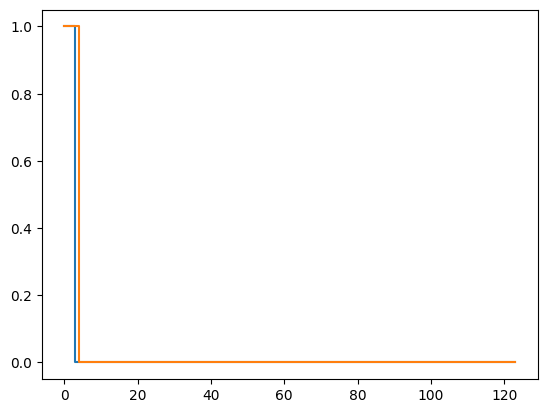

In [7]:
x = np.arange(len(c))
plt.step(x,s)
plt.step(x,s2)

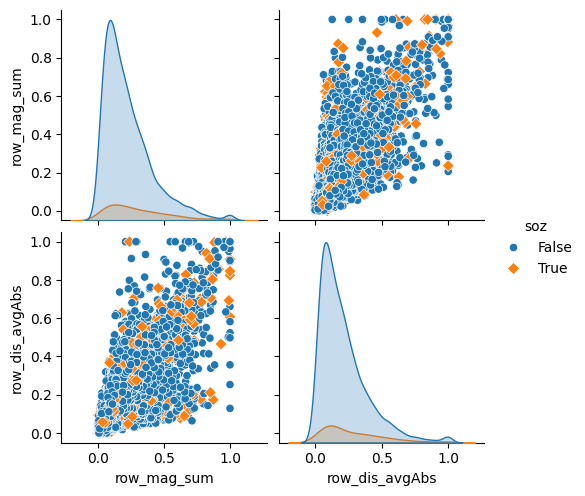

In [16]:
plotdf = df_normalized[df_normalized['ilae'].isin([1,2,3])][['soz', 'row_mag_sum', 'row_dis_avgAbs']]
sns.pairplot(plotdf, hue="soz", markers=["o", "D"])

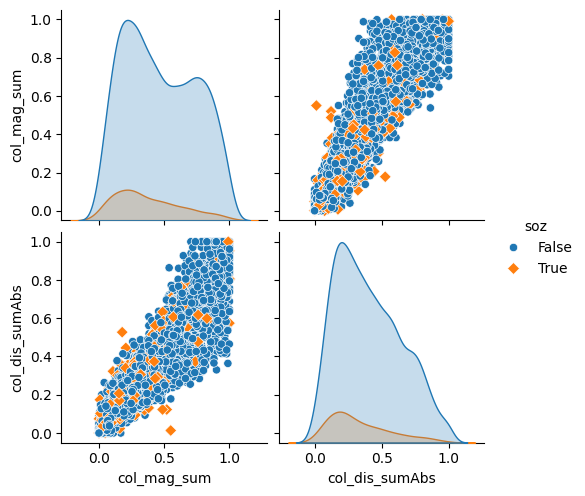

In [17]:
plotdf = df_normalized[df_normalized['ilae'].isin([1,2,3])][['soz','col_mag_sum','col_dis_sumAbs']]
sns.pairplot(plotdf, hue="soz", markers=["o", "D"])

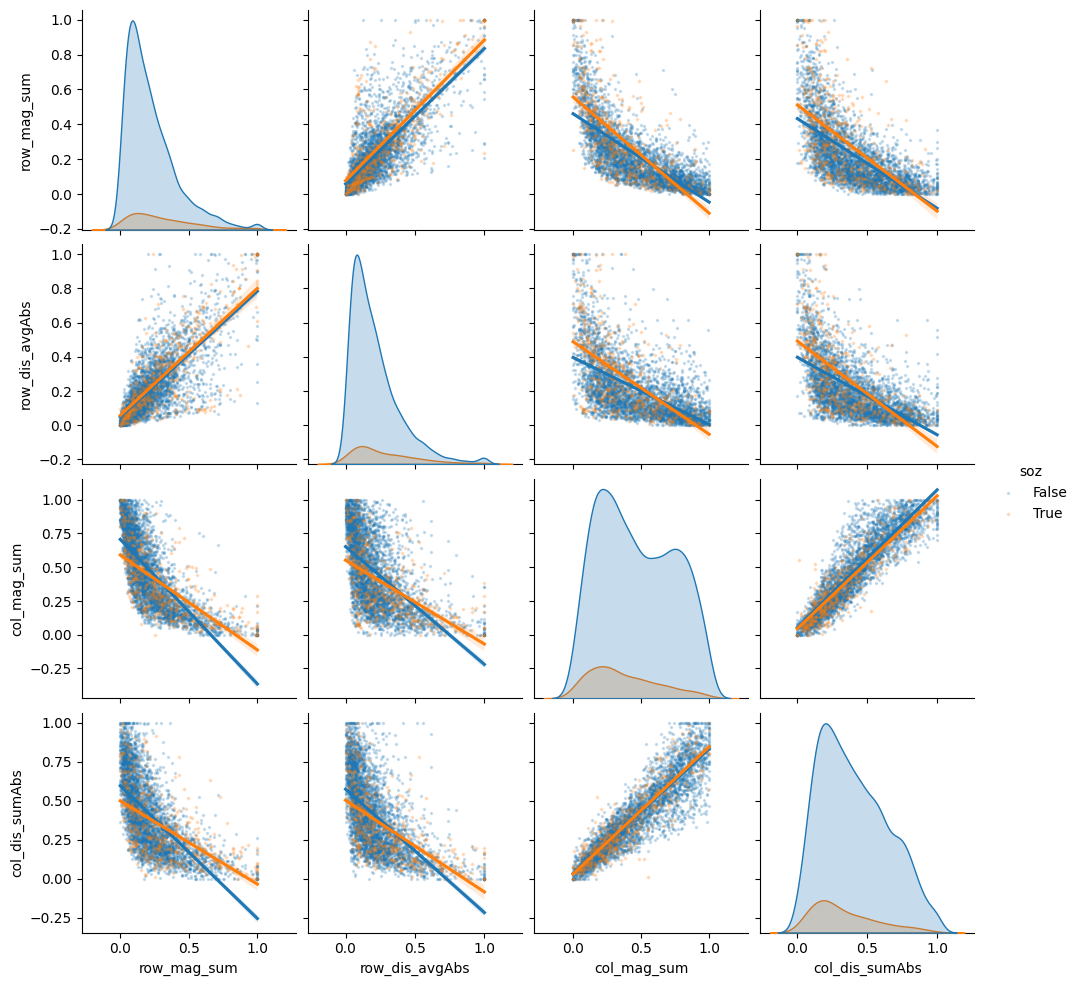

In [18]:
plotdf = df_normalized[df_normalized['ilae'].isin([1,2,3])][['soz', 'row_mag_sum', 'row_dis_avgAbs','col_mag_sum','col_dis_sumAbs']]
sns.pairplot(plotdf, hue="soz", markers=["o", "D"], kind='reg',plot_kws=dict(scatter_kws=dict(s=2, alpha=0.2)))

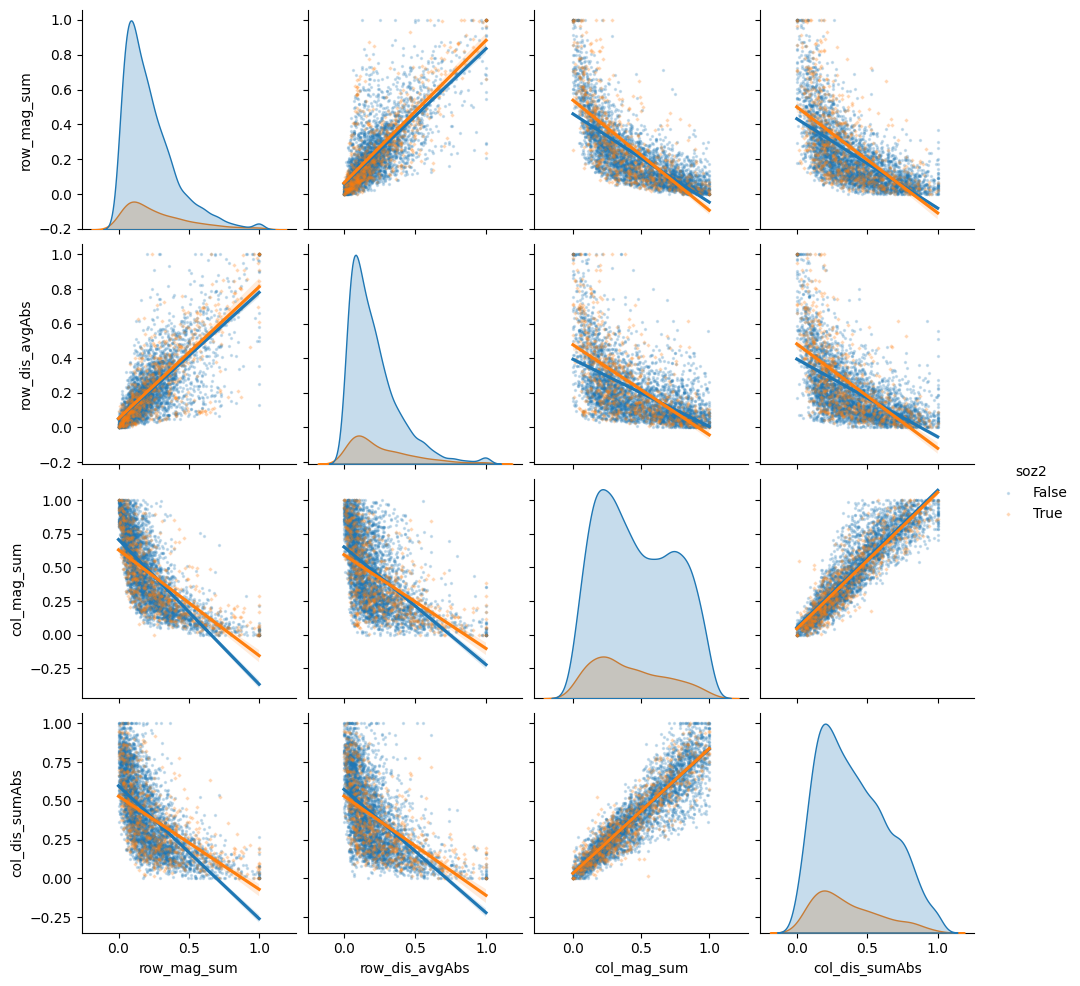

In [19]:
plotdf = df_normalized[df_normalized['ilae'].isin([1,2,3])][['soz2', 'row_mag_sum', 'row_dis_avgAbs','col_mag_sum','col_dis_sumAbs']]
sns.pairplot(plotdf, hue="soz2", markers=["o", "D"], kind='reg',plot_kws=dict(scatter_kws=dict(s=2, alpha=0.2)))

In [20]:
for pid in pids:
    plotdf = df_normalized[df_normalized['pid']==pid][['soz', 'row_mag_sum', 'row_dis_avgAbs','col_mag_sum','col_dis_sumAbs']]
    i =  df_normalized[df_normalized['pid']==pid]['ilae'].iloc[0]
    sns.pairplot(plotdf, hue="soz", markers=["o", "D"], plot_kws=dict(s=8, alpha=.9))
    plt.suptitle(f'PID: {pid} | ILAE: {i}')
    plt.savefig(f'pairplot_{pid}.png')
    plt.close()

/home/dan/miniconda3/envs/sourcesink/lib/python3.12/site-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (2) than needed (1), which may not be intended.
  func(x=x, y=y, **kwargs)
/home/dan/miniconda3/envs/sourcesink/lib/python3.12/site-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (2) than needed (1), which may not be intended.
  func(x=x, y=y, **kwargs)
/home/dan/miniconda3/envs/sourcesink/lib/python3.12/site-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (2) than needed (1), which may not be intended.
  func(x=x, y=y, **kwargs)
/home/dan/miniconda3/envs/sourcesink/lib/python3.12/site-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (2) than needed (1), which may not be intended.
  func(x=x, y=y, **kwargs)
/home/dan/miniconda3/envs/sourcesink/lib/python3.12/site-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (2) than n

In [50]:
df_normalized.to_csv('normalized_data.csv', index=False)

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load data
data = df_normalized
data = data.drop(columns=['pid', 'channel','soz2','ilae','brainnetome','harvard-oxford'])


# Separate features and target
X = data.drop(columns=['soz'])  # Assuming 'soz' is the target column
y = data['soz']
y = y.astype('category')


# Identify categorical and numerical features
categorical_features = ['miccai', 'aal']
numerical_features = [col for col in X.columns if col not in categorical_features]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Concatenate train and test to fit all categories
X_combined = pd.concat([X_train, X_test])

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numerical_features)
    ]
)

# Fit the preprocessor on combined data to include all categories
preprocessor.fit(X_combined)

# Model pipeline
model = RandomForestClassifier(random_state=42, n_jobs=15)
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('feature_selection', RFE(model, n_features_to_select=4)),
                           ('classifier', model)])

# Train the model
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8874878758486906
              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94      1830
         1.0       0.50      0.07      0.13       232

    accuracy                           0.89      2062
   macro avg       0.70      0.53      0.53      2062
weighted avg       0.85      0.89      0.85      2062



In [ ]:
pd.set_option("display.max_rows", None)


In [47]:

data = df_normalized
data = data.drop(columns=['pid', 'channel','soz2','ilae','brainnetome','harvard-oxford'])

data['miccai'] = data['miccai'].replace(['nan', 'NaN', ''], 'unknown')
data['miccai'].fillna('unknown', inplace=True)

data['aal'] = data['aal'].replace(['nan', 'NaN', ''], 'unknown')
data['aal'].fillna('unknown', inplace=True)
data['miccai'].value_counts()

miccai
Left_Cerebral_White_Matter                                   2575
Right_Cerebral_White_Matter                                  2310
unknown                                                       667
Left_MTG_middle_temporal_gyrus                                304
Right_MTG_middle_temporal_gyrus                               257
Left_PoG_postcentral_gyrus                                    192
Left_MFG_middle_frontal_gyrus                                 191
Left_STG_superior_temporal_gyrus                              174
Right_MFG_middle_frontal_gyrus                                162
Left_SMG_supramarginal_gyrus                                  156
Right_PoG_postcentral_gyrus                                   151
Left_CO_central_operculum                                     146
Right_PrG_precentral_gyrus                                    139
Left_PrG_precentral_gyrus                                     138
Right_SPL_superior_parietal_lobule                            130
Rig

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt

# One-hot encode categorical variables
encoder = OneHotEncoder()
encoded_cats = encoder.fit_transform(X[categorical_features]).toarray()

# Concatenate encoded categorical variables with numerical variables
numerical_data = X[numerical_features].values
X_processed = np.hstack((encoded_cats, numerical_data))

# Scale the data to [0, 1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_processed)

# Define and train the SOM
som_dim = (10, 10)  # You can adjust dimensions for finer or coarser mapping
som = MiniSom(x=som_dim[0], y=som_dim[1], input_len=X_scaled.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(X_scaled)
som.train_random(X_scaled, 1000)  # Train with 1000 iterations

# Visualize the SOM results
plt.figure(figsize=(10, 10))
for i, x in enumerate(X_scaled):
    w = som.winner(x)  # Get the winning node
    plt.text(w[0] + 0.5, w[1] + 0.5, str(int(y.iloc[i])), color='red' if y.iloc[i] == 1 else 'blue', fontdict={'weight': 'bold', 'size': 9})

plt.xlim([0, som_dim[0]])
plt.ylim([0, som_dim[1]])
plt.title('Self-Organizing Map - Visualization')
plt.grid()
plt.show()
